Import the neccessary libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

Data Loading

In [41]:
print("Loading Netflx stock data.....")
df = pd.read_csv("netflix.csv")
print("Data loaded successfully")

Loading Netflx stock data.....
Data loaded successfully


Data Preprocessing and Feature Engineering

In [42]:
# Data Preprocessing involves cleaning and preparing the data for model
# We'll define our features (X) and target (y)
# The "Date" column is not a numerical feature, so we will not include it in our model

# Rename the columns for clarity and consistency
df.rename(columns={
    "Open":"open",
    "Close":"close",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Volume":"volume"
},inplace=True)

# Check for missing values 
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicated values
df_duplicates = df.duplicated().sum()
print("Duplicated values")
print(df_duplicates)

# Drop duplicates if found
df = df.drop_duplicates()

# Drop any row wih missing values
df = df.dropna()

# Define the features (X) and the target (y)
features = ["open","high","low","volume"]
target = "close"

X = df[features]
y = df[target]

print("Shape of features (X):",X.shape)
print("Shape of target (y)",y.shape)

Missing values
Date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64
Duplicated values
0
Shape of features (X): (5824, 4)
Shape of target (y) (5824,)


Data Spliting

In [43]:
# We split the data into a training set and a testing set.
# The model learns from the training data and is then evaluated on the testing data,
# which it has never seen before. This gives a realistic measure of its performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of samples in training set:",len(X_train))
print("Number of samples in testing set:",len(X_test))

Number of samples in training set: 4659
Number of samples in testing set: 1165


Model Training

In [44]:
# We initialize our Linear Regression model and train it using the training data
# The "fit" method is where the magic happens, as the model learns the coefficients for its linear equation

print("Training the Linear Regression model...........")
model = LinearRegression()
model.fit(X_train,y_train)
print("Model Training complete!")

Training the Linear Regression model...........
Model Training complete!


Model Evaluation

In [45]:
# We use the trained model to make predictions on the test set
# We then evaluate these predictions using key metrics
# Mean Squared Error (MSE) is the average of the squared errors
# R-Squared measures the proportion of variance in the dependent variable that is predictable from the independent variables

print("Evaluating the model.......")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Sqaured Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluating the model.......
Mean Sqaured Error (MSE): 4.99
R-squared: 1.00


Visualization

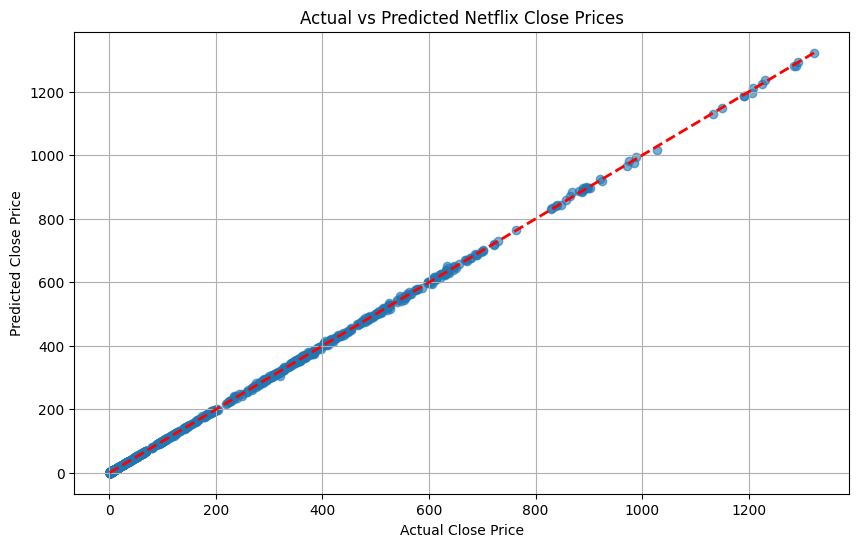

In [46]:
# A scatter plot is an  excellent way to visualize the model's performance
# We plot the actual prices against the predicted prices. If the model is perfect
# all points will fall on the dashed red line

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Netflix Close Prices")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.show()

Making a New Prediction

In [47]:
# Finally, we can use our trained model  to make a prediction on a new, unseen data
# This simulates how the model would be used in a real application
# Note: These values are hypothetical

new_data = pd.DataFrame({
    "open":[600.0],
    "high":[610.0],
    "low":[595.0],
    "volume":[5000000]
})

predicted_price = model.predict(new_data)
print("Example prediction for a new data point")
print(f"Features: open=600, high:610, low=595, volume=5M")
print(f"Predicted Close Price: ${predicted_price[0]:.2f}")

Example prediction for a new data point
Features: open=600, high:610, low=595, volume=5M
Predicted Close Price: $604.19
